In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # preprocessing
from imblearn.over_sampling import SMOTE  # preprocessing
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

df.columns = new_cols

In [4]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart-disease,0
ever-married,0
work-type,0
Residence-type,0
avg-glucose-level,0
bmi,201
smoking-status,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart-disease,0
ever-married,0
work-type,0
Residence-type,0
avg-glucose-level,0
bmi,0
smoking-status,0


In [10]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In [11]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [12]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [13]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


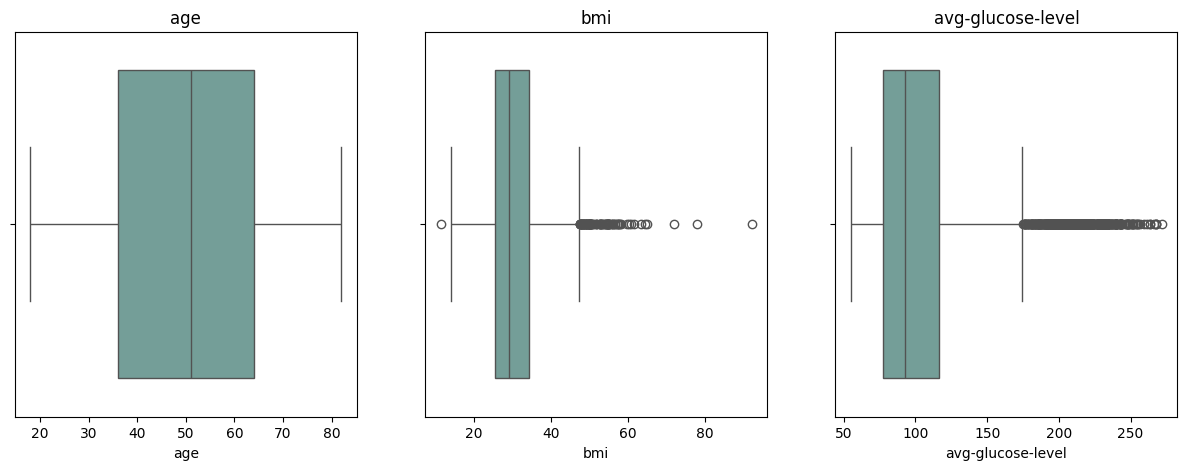

In [14]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [15]:
df = df[df['bmi'] < 90]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [16]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [17]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [18]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.51%


In [19]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [20]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


<ipython-input-20-b4262c1a1479>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [21]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


<ipython-input-21-c5ba8f636434>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
<ipython-input-21-c5ba8f636434>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
<ipython-input-21-c5ba8f636434>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

In [22]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


<ipython-input-22-d7e943eef3f3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
<ipython-input-22-d7e943eef3f3>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))


In [23]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


<ipython-input-23-e67a66ef2d7a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
<ipython-input-23-e67a66ef2d7a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
<ipython-input-23-e67a66ef2d7a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [25]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [26]:
from sklearn.model_selection import train_test_split

features = np.array(df.columns[:-1])
print(features)
X = df.drop(['stroke'], axis = 1) # Set di caratteristiche
y = df['stroke'] # Target da prevedere

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [27]:
y.value_counts()

,count
stroke,
0,3074
1,180


<Axes: ylabel='count'>

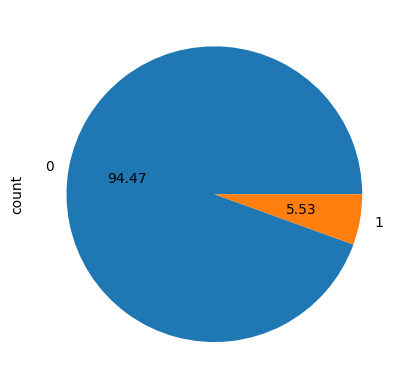

In [28]:
y.value_counts().plot.pie(autopct = "%.2f")

In [29]:
print(X)

      gender   age  hypertension  heart-disease ever-married      work-type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5100    Male  82.0             1              0          Yes  Self-employed   
5102  Female  57.0             0              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
print(X_train)

      gender   age  hypertension  heart-disease ever-married      work-type  \
992     Male  82.0             0              1          Yes  Self-employed   
3740  Female  26.0             0              0          Yes        Private   
1122    Male  19.0             0              0           No        Private   
5030    Male  21.0             0              0          Yes        Private   
2571    Male  49.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
688   Female  52.0             1              0          Yes        Private   
2751  Female  48.0             0              0          Yes       Govt_job   
3649  Female  75.0             0              0          Yes  Self-employed   
711   Female  37.0             0              0           No  Self-employed   
1227    Male  53.0             0              0          Yes  Self-employed   

     Residence-type  avg-glucose-level   bmi   smok

In [32]:
print(X_test)

      gender   age  hypertension  heart-disease ever-married      work-type  \
955     Male  31.0             0              0          Yes        Private   
3060    Male  49.0             0              0          Yes  Self-employed   
2115  Female  49.0             0              0          Yes        Private   
923     Male  71.0             0              1          Yes  Self-employed   
3445  Female  41.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
3703    Male  43.0             0              0          Yes       Govt_job   
2537  Female  67.0             0              0          Yes  Self-employed   
4117  Female  36.0             0              0          Yes       Govt_job   
123     Male  56.0             1              0          Yes        Private   
4748  Female  28.0             0              0          Yes       Govt_job   

     Residence-type  avg-glucose-level   bmi   smok

In [33]:
gender = pd.get_dummies(X_train["gender"], prefix="gender")
married = pd.get_dummies(X_train["ever-married"], prefix="ever-married")
work = pd.get_dummies(X_train["work-type"], prefix="work-type")
residence = pd.get_dummies(X_train["Residence-type"], prefix="Residence-type")
smoking = pd.get_dummies(X_train["smoking-status"], prefix="smoking-status")

# the features that are one hot encoded
one_hot_features = ["gender", "ever-married", "work-type", "Residence-type", "smoking-status"]
X_train.drop(columns=one_hot_features, inplace=True)


X_tmp_0 = pd.concat([gender, married, work, residence, smoking], axis=1)
dummies_columns = X_tmp_0.columns

X_train = pd.concat([X_train, X_tmp_0], axis=1)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

features_to_encode = ["gender_Female", "gender_Male", "ever-married_No", "ever-married_Yes", "work-type_Govt_job", "work-type_Never_worked", "work-type_Private", "work-type_Self-employed","Residence-type_Rural", "Residence-type_Urban","smoking-status_formerly smoked", "smoking-status_never smoked", "smoking-status_smokes"]

encoder = OrdinalEncoder()

X_train[features_to_encode] = encoder.fit_transform(X_train[features_to_encode])

In [35]:
print(X_train)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
992   82.0             0              1              72.93  27.1   
3740  26.0             0              0              91.35  23.8   
1122  19.0             0              0              96.84  30.2   
5030  21.0             0              0              77.42  24.8   
2571  49.0             0              0              92.02  38.1   
...    ...           ...            ...                ...   ...   
688   52.0             1              0              81.03  32.6   
2751  48.0             0              0             255.17  38.1   
3649  75.0             0              0              96.95  41.4   
711   37.0             0              0             134.39  22.7   
1227  53.0             0              0              94.89  28.5   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
992             0.0          1.0              0.0               1.0   
3740            1.0          0.0         

In [36]:
tmp_features = X_train.columns
print(tmp_features)

Index(['age', 'hypertension', 'heart-disease', 'avg-glucose-level', 'bmi',
       'gender_Female', 'gender_Male', 'ever-married_No', 'ever-married_Yes',
       'work-type_Govt_job', 'work-type_Never_worked', 'work-type_Private',
       'work-type_Self-employed', 'Residence-type_Rural',
       'Residence-type_Urban', 'smoking-status_formerly smoked',
       'smoking-status_never smoked', 'smoking-status_smokes'],
      dtype='object')


In [37]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [38]:
# convert to dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)
print(X_smote)

            age  hypertension  heart-disease  avg-glucose-level        bmi  \
0     82.000000             0              1          72.930000  27.100000   
1     26.000000             0              0          91.350000  23.800000   
2     19.000000             0              0          96.840000  30.200000   
3     21.000000             0              0          77.420000  24.800000   
4     49.000000             0              0          92.020000  38.100000   
...         ...           ...            ...                ...        ...   
4915  74.415175             0              0         104.207610  29.362944   
4916  79.201570             0              0          93.331191  23.927880   
4917  80.411285             0              1         105.459361  30.957681   
4918  72.819058             0              0          64.770178  24.929696   
4919  72.687293             1              0         221.675451  29.037790   

      gender_Female  gender_Male  ever-married_No  ever-married

In [39]:
X_smote = np.round(X_smote)
X_smote[features_to_encode] = encoder.inverse_transform(X_smote[features_to_encode])
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     82.0             0              1               73.0  27.0   
1     26.0             0              0               91.0  24.0   
2     19.0             0              0               97.0  30.0   
3     21.0             0              0               77.0  25.0   
4     49.0             0              0               92.0  38.0   
...    ...           ...            ...                ...   ...   
4915  74.0             0              0              104.0  29.0   
4916  79.0             0              0               93.0  24.0   
4917  80.0             0              1              105.0  31.0   
4918  73.0             0              0               65.0  25.0   
4919  73.0             1              0              222.0  29.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0             False         True            False              True   
1              True        False         

In [40]:
dummies = pd.from_dummies(X_smote[dummies_columns], sep='_')
print(dummies)

      gender ever-married      work-type Residence-type   smoking-status
0       Male          Yes  Self-employed          Rural  formerly smoked
1     Female          Yes        Private          Urban     never smoked
2       Male           No        Private          Rural  formerly smoked
3       Male          Yes        Private          Rural     never smoked
4       Male          Yes        Private          Urban     never smoked
...      ...          ...            ...            ...              ...
4915  Female          Yes        Private          Urban     never smoked
4916  Female          Yes        Private          Rural     never smoked
4917    Male          Yes        Private          Rural     never smoked
4918  Female          Yes        Private          Urban     never smoked
4919  Female          Yes        Private          Urban     never smoked

[4920 rows x 5 columns]


In [41]:
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     82.0             0              1               73.0  27.0   
1     26.0             0              0               91.0  24.0   
2     19.0             0              0               97.0  30.0   
3     21.0             0              0               77.0  25.0   
4     49.0             0              0               92.0  38.0   
...    ...           ...            ...                ...   ...   
4915  74.0             0              0              104.0  29.0   
4916  79.0             0              0               93.0  24.0   
4917  80.0             0              1              105.0  31.0   
4918  73.0             0              0               65.0  25.0   
4919  73.0             1              0              222.0  29.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0             False         True            False              True   
1              True        False         

In [42]:
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0    Male   
1     26.0             0              0               91.0  24.0  Female   
2     19.0             0              0               97.0  30.0    Male   
3     21.0             0              0               77.0  25.0    Male   
4     49.0             0              0               92.0  38.0    Male   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0  Female   
4916  79.0             0              0               93.0  24.0  Female   
4917  80.0             0              1              105.0  31.0    Male   
4918  73.0             0              0               65.0  25.0  Female   
4919  73.0             1              0              222.0  29.0  Female   

     ever-married      work-type Residence-type   smoking-status  
0             Yes  S

In [43]:
X_train = X_smote
y_train = y_smote

In [44]:
df_balanced = pd.DataFrame(X_train, columns=features)
df_balanced['stroke'] = y_train

In [45]:
df_balanced.shape

(4920, 11)

<Axes: xlabel='stroke', ylabel='count'>

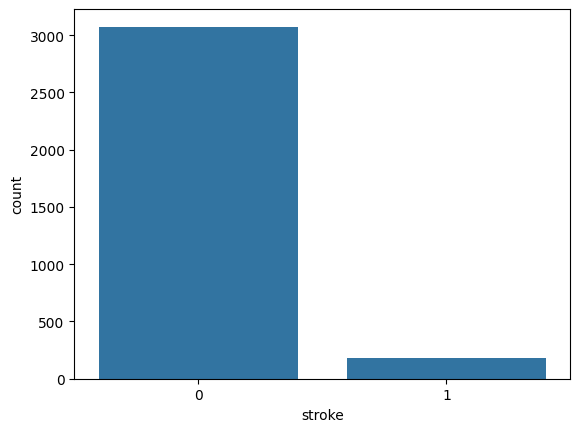

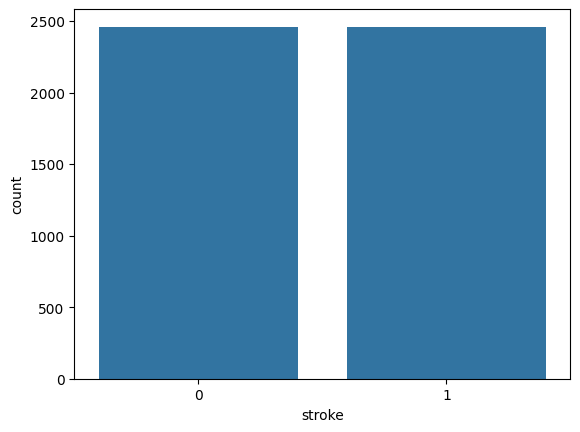

In [46]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

<Axes: xlabel='age_bucket', ylabel='percent'>

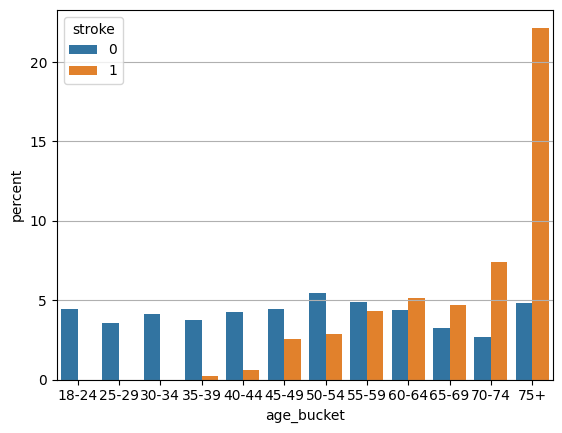

In [47]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

<Axes: xlabel='hypertension', ylabel='percent'>

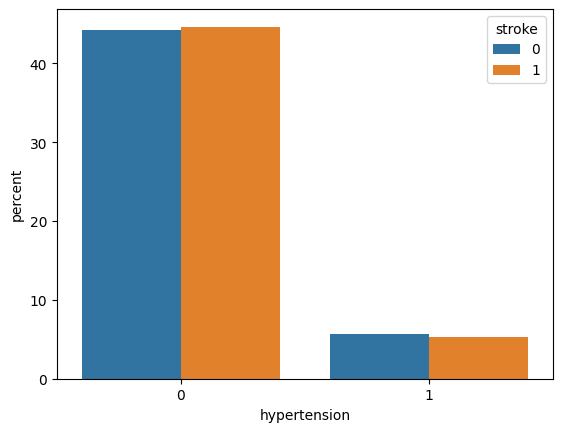

In [48]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='heart-disease', ylabel='percent'>

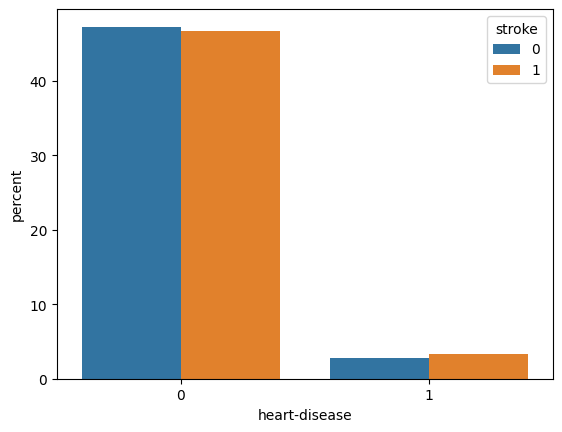

In [49]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='smoking-status', ylabel='percent'>

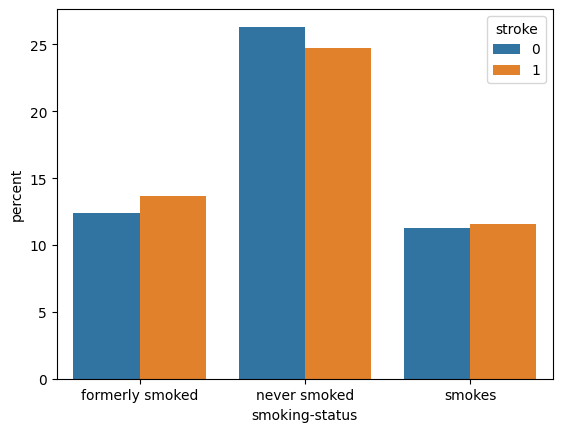

In [50]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='bmi_bucket', ylabel='percent'>

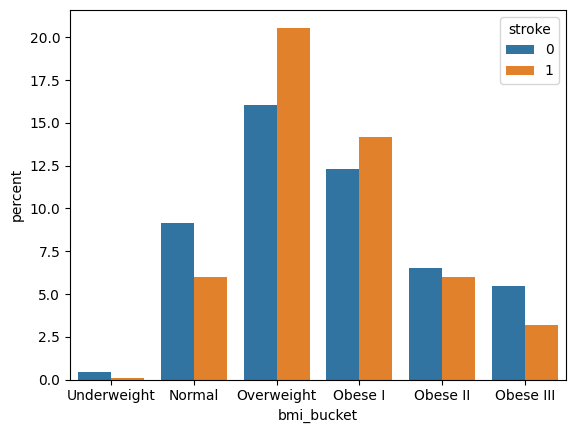

In [51]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<Axes: xlabel='Residence-type', ylabel='percent'>

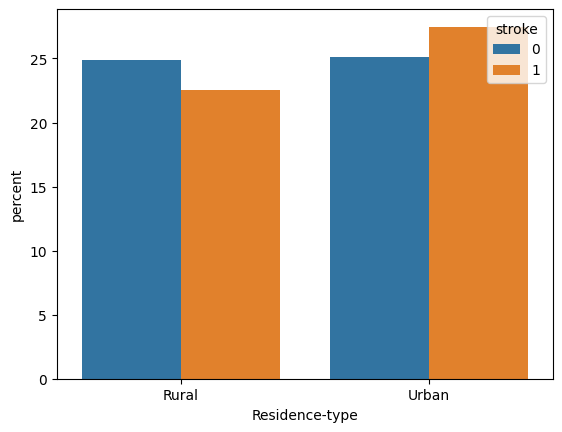

In [52]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='work-type', ylabel='percent'>

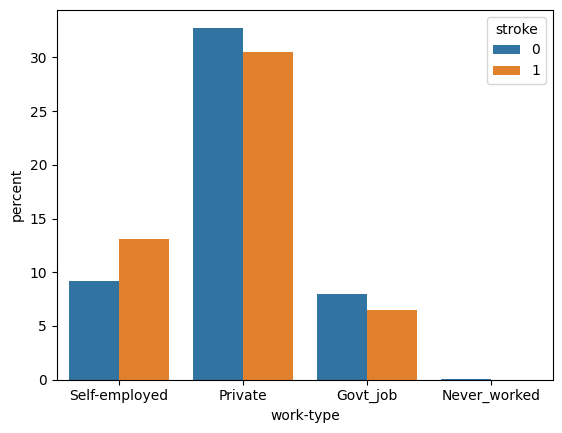

In [53]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='gender', ylabel='percent'>

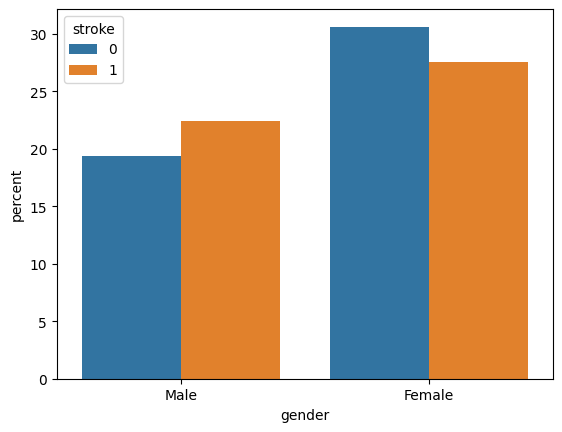

In [54]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

In [55]:
from sklearn.ensemble import RandomForestClassifier
# Combinazione di X e y in un nuovo DataFrame
df_copy = pd.concat([X_train, y_train], axis=1)

print("Nuovo dataset combinato (X + y):")
print(df_copy)

Nuovo dataset combinato (X + y):
       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0    Male   
1     26.0             0              0               91.0  24.0  Female   
2     19.0             0              0               97.0  30.0    Male   
3     21.0             0              0               77.0  25.0    Male   
4     49.0             0              0               92.0  38.0    Male   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0  Female   
4916  79.0             0              0               93.0  24.0  Female   
4917  80.0             0              1              105.0  31.0    Male   
4918  73.0             0              0               65.0  25.0  Female   
4919  73.0             1              0              222.0  29.0  Female   

     ever-married      work-type Residence-type   smok

In [56]:
from sklearn.preprocessing import LabelEncoder
# Separare le caratteristiche (X) e la variabile target (y)
X_train_copy = df_copy.drop('stroke', axis=1)
y_train_copy = df_copy['stroke']

# Esegui il Label Encoding per le caratteristiche categoriali
label_encoders = {}
for column in X_train_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_copy[column] = le.fit_transform(X_train_copy[column])
    label_encoders[column] = le

In [57]:
print(X_train_copy)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0       1   
1     26.0             0              0               91.0  24.0       0   
2     19.0             0              0               97.0  30.0       1   
3     21.0             0              0               77.0  25.0       1   
4     49.0             0              0               92.0  38.0       1   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0       0   
4916  79.0             0              0               93.0  24.0       0   
4917  80.0             0              1              105.0  31.0       1   
4918  73.0             0              0               65.0  25.0       0   
4919  73.0             1              0              222.0  29.0       0   

      ever-married  work-type  Residence-type  smoking-status  
0                1     

In [58]:
print(X_train)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0    Male   
1     26.0             0              0               91.0  24.0  Female   
2     19.0             0              0               97.0  30.0    Male   
3     21.0             0              0               77.0  25.0    Male   
4     49.0             0              0               92.0  38.0    Male   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0  Female   
4916  79.0             0              0               93.0  24.0  Female   
4917  80.0             0              1              105.0  31.0    Male   
4918  73.0             0              0               65.0  25.0  Female   
4919  73.0             1              0              222.0  29.0  Female   

     ever-married      work-type Residence-type   smoking-status  
0             Yes  S

             Feature  Importance
0                age    0.402643
3  avg-glucose-level    0.242257
4                bmi    0.145299
9     smoking-status    0.055632
7          work-type    0.044592
8     Residence-type    0.030903
5             gender    0.027649
6       ever-married    0.019285
1       hypertension    0.016460
2      heart-disease    0.015280


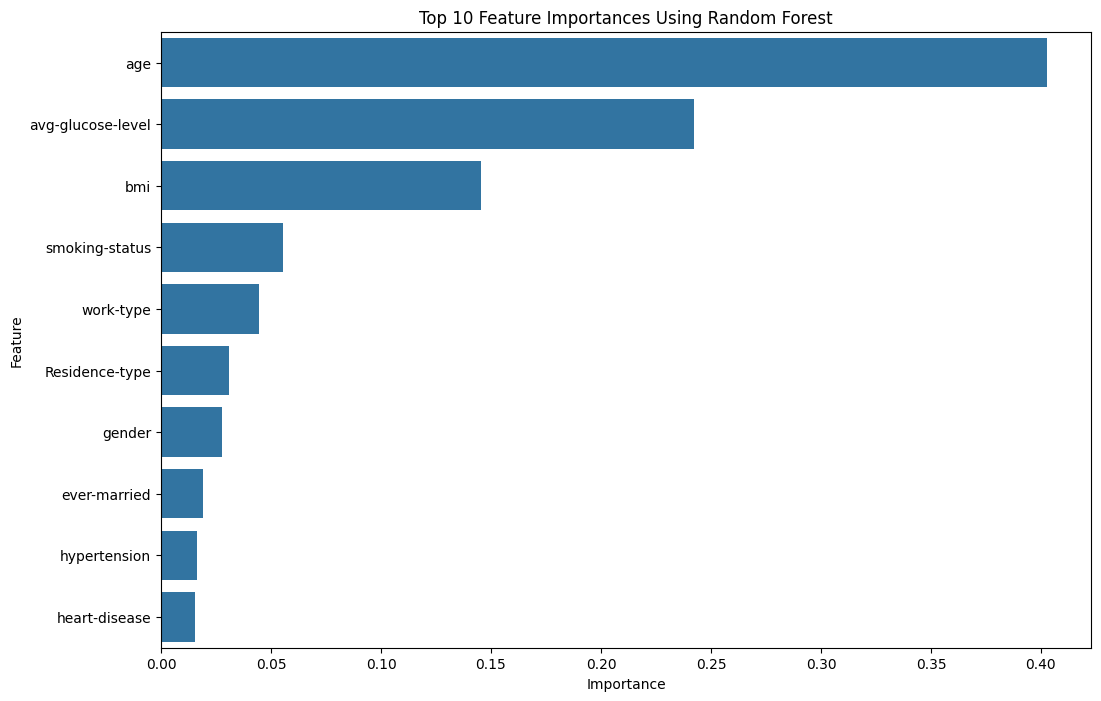

In [59]:
# Creare e allenare il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_copy, y_train_copy)

# Ottenere l'importanza delle caratteristiche
feature_importances = rf.feature_importances_

# Creare un DataFrame per visualizzare le importanze
feature_importances_df = pd.DataFrame({
    'Feature': X_train_copy.columns,
    'Importance': feature_importances
})

# Ordinare le caratteristiche per importanza decrescente
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualizzare le prime 10 caratteristiche più importanti
print(feature_importances_df.head(10))

# visualizzare l'importanza delle caratteristiche con un grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Feature Importances Using Random Forest')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier
# Creare e allenare il modello di Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_copy, y_train_copy)

# Ottenere l'importanza delle caratteristiche (Information Gain)
feature_importances = dt.feature_importances_

# Creare un DataFrame per visualizzare le importanze
feature_importances_df = pd.DataFrame({
    'Feature': X_train_copy.columns,
    'Information Gain': feature_importances
})

# Ordinare le caratteristiche per importanza decrescente
feature_importances_df = feature_importances_df.sort_values(by='Information Gain', ascending=False)

# Visualizzare le caratteristiche ordinate per Information Gain
print("Importanza delle caratteristiche (Information Gain):")
print(feature_importances_df)

Importanza delle caratteristiche (Information Gain):
             Feature  Information Gain
0                age          0.382550
3  avg-glucose-level          0.222506
4                bmi          0.158783
9     smoking-status          0.061710
7          work-type          0.055380
8     Residence-type          0.036933
5             gender          0.026578
1       hypertension          0.021784
2      heart-disease          0.019623
6       ever-married          0.014154


In [61]:
# Combinazione di X e y in un nuovo DataFrame
df_test_copy = pd.concat([X_test, y_test], axis=1)

print("Nuovo dataset combinato (X + y):")
print(df_copy)

Nuovo dataset combinato (X + y):
       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0    Male   
1     26.0             0              0               91.0  24.0  Female   
2     19.0             0              0               97.0  30.0    Male   
3     21.0             0              0               77.0  25.0    Male   
4     49.0             0              0               92.0  38.0    Male   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0  Female   
4916  79.0             0              0               93.0  24.0  Female   
4917  80.0             0              1              105.0  31.0    Male   
4918  73.0             0              0               65.0  25.0  Female   
4919  73.0             1              0              222.0  29.0  Female   

     ever-married      work-type Residence-type   smok

In [62]:
# Separare le caratteristiche (X) e la variabile target (y)
X_test_copy = df_test_copy.drop('stroke', axis=1)
y_test_copy = df_test_copy['stroke']

# Esegui il Label Encoding per le caratteristiche categoriali
label_encoders = {}
for column in X_test_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_test_copy[column] = le.fit_transform(X_test_copy[column])
    label_encoders[column] = le

In [63]:
print(len(y_test))
print(len(y_test_copy))

651
651


In [64]:
print(X_train_copy)
print(X_test_copy)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     82.0             0              1               73.0  27.0       1   
1     26.0             0              0               91.0  24.0       0   
2     19.0             0              0               97.0  30.0       1   
3     21.0             0              0               77.0  25.0       1   
4     49.0             0              0               92.0  38.0       1   
...    ...           ...            ...                ...   ...     ...   
4915  74.0             0              0              104.0  29.0       0   
4916  79.0             0              0               93.0  24.0       0   
4917  80.0             0              1              105.0  31.0       1   
4918  73.0             0              0               65.0  25.0       0   
4919  73.0             1              0              222.0  29.0       0   

      ever-married  work-type  Residence-type  smoking-status  
0                1     

In [65]:
# Cambiare l'ordine delle caratteristiche in X_test_copy per corrispondere a X_train_copy
X_test_copy = X_test_copy[X_train_copy.columns]
print(len(X_train_copy))
print(len(X_test_copy))

4920
651


In [66]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
nb = GaussianNB()
nb.fit(X_train_copy, y_train_copy);
# Fare previsioni sul test set
y_pred = nb.predict(X_test_copy)

#print(y_pred)
# Creare un DataFrame per confrontare le previsioni con i valori reali
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsione': y_pred
})

print("Confronto tra valori reali e previsioni:")
print(comparison_df)

Confronto tra valori reali e previsioni:
      Real  Previsione
955      0           0
3060     0           0
2115     0           0
923      0           1
3445     0           0
...    ...         ...
3703     0           0
2537     0           1
4117     0           0
123      1           1
4748     0           0

[651 rows x 2 columns]


In [67]:
# Creare e allenare il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_copy, y_train_copy)

# Fare previsioni sul test set
y_pred = rf.predict(X_test_copy)
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsione': y_pred
})

print("Confronto tra valori reali e previsioni:")
print(comparison_df)

Confronto tra valori reali e previsioni:
      Real  Previsione
955      0           0
3060     0           1
2115     0           0
923      0           0
3445     0           0
...    ...         ...
3703     0           0
2537     0           0
4117     0           0
123      1           0
4748     0           0

[651 rows x 2 columns]


In [68]:
# Creare e allenare il modello di Regressione Logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_copy, y_train_copy)

# Fare previsioni sul test set
y_pred = lr.predict(X_test_copy)
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsione': y_pred
})

print("Confronto tra valori reali e previsioni:")
print(comparison_df)

Confronto tra valori reali e previsioni:
      Real  Previsione
955      0           0
3060     0           1
2115     0           0
923      0           1
3445     0           0
...    ...         ...
3703     0           0
2537     0           1
4117     0           0
123      1           1
4748     0           0

[651 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# Normalizzare le caratteristiche, KNN è sensibile alla scala, quindi normalizziamo le caratteristiche assicurandoci
# che abbiano la stessa scala
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train_copy)
X_test_copy = scaler.transform(X_test_copy)

# Creare e allenare il modello k-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_copy, y_train_copy)

# Fare previsioni sul test set
y_pred = knn.predict(X_test_copy)
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsione': y_pred
})

print("Confronto tra valori reali e previsioni:")
print(comparison_df)

Confronto tra valori reali e previsioni:
      Real  Previsione
955      0           0
3060     0           1
2115     0           0
923      0           1
3445     0           0
...    ...         ...
3703     0           0
2537     0           0
4117     0           0
123      1           1
4748     0           0

[651 rows x 2 columns]
